In [2]:
import pandas as pd

df = pd.read_csv(r"C:\Users\lubac\ACQuA.csv", header=0)
df_french = pd.read_csv(r"C:\Users\lubac\french_df.csv", header=0, index_col=0)
df_russian = pd.read_csv(r"C:\Users\lubac\russian_df.csv", header=0, index_col=0)

In [3]:
df_en_fr_ru = pd.concat([df, df_french, df_russian], ignore_index=True)
df_en_fr_ru = df_en_fr_ru.drop(columns=['id',
                      'domain',
                      'it_1_confidence',
                      'it_2_confidence',
                      'better_count',
                      'worse_count',
                      'none_count',
                      'most_frequent_count',
                      'it_1_judgments', 
                      'it_2_judgments', 
                      'sentence_html', 
                      'judgments', 
                      'confidence', 
                      'dconfidence'])

df_en_fr_ru = df_en_fr_ru.dropna()

In [4]:
from tqdm import tqdm

objects_a, objects_b, sentences, labels = df_en_fr_ru.object_a.to_list(), df_en_fr_ru.object_b.to_list(), df_en_fr_ru.sentence.to_list(), df_en_fr_ru.most_frequent_label.to_list()

label_d = {'WORSE': 0, 'BETTER': 1, 'NONE': 2}

prepared = []
labels_new = []

for i in tqdm(range(len(objects_a))):
  text = 'OBJECT1 ' + objects_a[i] + ' OBJECT2 ' + objects_b[i] + ' SENTENCE ' + sentences[i]
  prepared.append(text)
  labels_new.append(label_d[labels[i]])

100%|██████████| 21554/21554 [00:00<00:00, 1781570.79it/s]


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(prepared, labels_new, test_size=0.2, random_state=42)

In [6]:
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import classification_report, f1_score, recall_score, precision_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline, FeatureUnion
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

## BOW

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

In [8]:
from sklearn.metrics import f1_score

In [9]:
classifiers = [('Logistic Regression', LogisticRegression()),
               ('AdaBoost', AdaBoostClassifier()), ('SVM (linear)', LinearSVC()),
               ('Decision Tree', DecisionTreeClassifier()),
               ('SGD Classifier', SGDClassifier()), ('Random Forest', RandomForestClassifier()), ('Extra Trees', ExtraTreesClassifier()), ('k-Neighbors', KNeighborsClassifier()),
               ('SVM (radial basis function)', SVC(kernel='rbf')), ('SVM (polynomial)', SVC(kernel='poly')), ('SVM (sigmoid)', SVC(kernel='sigmoid')),
               #('Multinomial NB', MultinomialNB()), 
               ('Majority Class Baseline', DummyClassifier(strategy='most_frequent')), ('XGBoost', XGBClassifier(n_jobs=8, n_estimators=1000))
               ]

results_bow = []
for name, classifier in classifiers:
    fitted = classifier.fit(X_train_bow, y_train)
    predicted = fitted.predict(X_test_bow)
    print(name)
    f1 = f1_score(y_test, predicted, average='weighted')
    print(f1)
    print(classification_report(y_test, predicted, labels = [0, 1, 2], target_names=['WORSE', 'BETTER', 'NONE']))
    results_bow.append([name, f1])

C:\Users\lubac\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression
0.7788730740199101
              precision    recall  f1-score   support

       WORSE       0.43      0.27      0.33       343
      BETTER       0.63      0.54      0.58       824
        NONE       0.85      0.92      0.88      3144

    accuracy                           0.79      4311
   macro avg       0.64      0.57      0.60      4311
weighted avg       0.77      0.79      0.78      4311

AdaBoost
0.7307606358527607
              precision    recall  f1-score   support

       WORSE       0.42      0.10      0.16       343
      BETTER       0.59      0.37      0.46       824
        NONE       0.80      0.94      0.86      3144

    accuracy                           0.77      4311
   macro avg       0.60      0.47      0.49      4311
weighted avg       0.73      0.77      0.73      4311



C:\Users\lubac\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM (linear)
0.7810766656207194
              precision    recall  f1-score   support

       WORSE       0.42      0.34      0.38       343
      BETTER       0.60      0.58      0.59       824
        NONE       0.86      0.89      0.88      3144

    accuracy                           0.79      4311
   macro avg       0.63      0.60      0.61      4311
weighted avg       0.78      0.79      0.78      4311

Decision Tree
0.7319329796012994
              precision    recall  f1-score   support

       WORSE       0.32      0.24      0.28       343
      BETTER       0.52      0.47      0.49       824
        NONE       0.82      0.86      0.84      3144

    accuracy                           0.74      4311
   macro avg       0.56      0.53      0.54      4311
weighted avg       0.73      0.74      0.73      4311

SGD Classifier
0.7892518617789648
              precision    recall  f1-score   support

       WORSE       0.47      0.32      0.38       343
      BETTER       0.63      0

C:\Users\lubac\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lubac\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lubac\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344

XGBoost
0.7916047249274032
              precision    recall  f1-score   support

       WORSE       0.54      0.28      0.37       343
      BETTER       0.68      0.55      0.61       824
        NONE       0.84      0.93      0.89      3144

    accuracy                           0.81      4311
   macro avg       0.69      0.59      0.62      4311
weighted avg       0.79      0.81      0.79      4311



## TF-IDF

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [11]:
classifiers = [('Logistic Regression', LogisticRegression()),
               ('AdaBoost', AdaBoostClassifier()), ('SVM (linear)', LinearSVC()),
               ('Decision Tree', DecisionTreeClassifier()),
               ('SGD Classifier', SGDClassifier()), ('Random Forest', RandomForestClassifier()), ('Extra Trees', ExtraTreesClassifier()), ('k-Neighbors', KNeighborsClassifier()),
               ('SVM (radial basis function)', SVC(kernel='rbf')), ('SVM (polynomial)', SVC(kernel='poly')), ('SVM (sigmoid)', SVC(kernel='sigmoid')),
               #('Multinomial NB', MultinomialNB()), 
               ('Majority Class Baseline', DummyClassifier(strategy='most_frequent')), ('XGBoost', XGBClassifier(n_jobs=8, n_estimators=1000))
               ]

results_tfidf = []
for name, classifier in classifiers:
    fitted = classifier.fit(X_train_tfidf, y_train)
    predicted = fitted.predict(X_test_tfidf)
    print(name)
    f1 = f1_score(y_test, predicted, average='weighted')
    print(f1)
    print(classification_report(y_test, predicted, labels = [0, 1, 2], target_names=['WORSE', 'BETTER', 'NONE']))
    results_tfidf.append([name, f1])

C:\Users\lubac\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression
0.7592632234012736
              precision    recall  f1-score   support

       WORSE       0.49      0.11      0.18       343
      BETTER       0.66      0.46      0.54       824
        NONE       0.82      0.95      0.88      3144

    accuracy                           0.79      4311
   macro avg       0.66      0.51      0.53      4311
weighted avg       0.76      0.79      0.76      4311

AdaBoost
0.7424582279817725
              precision    recall  f1-score   support

       WORSE       0.45      0.15      0.23       343
      BETTER       0.57      0.43      0.49       824
        NONE       0.81      0.92      0.86      3144

    accuracy                           0.77      4311
   macro avg       0.61      0.50      0.53      4311
weighted avg       0.74      0.77      0.74      4311

SVM (linear)
0.7945576362970196
              precision    recall  f1-score   support

       WORSE       0.55      0.27      0.37       343
      BETTER       0.67      0

C:\Users\lubac\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lubac\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lubac\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344

XGBoost
0.7876648432627481
              precision    recall  f1-score   support

       WORSE       0.50      0.26      0.34       343
      BETTER       0.65      0.54      0.59       824
        NONE       0.85      0.93      0.89      3144

    accuracy                           0.80      4311
   macro avg       0.67      0.58      0.61      4311
weighted avg       0.78      0.80      0.79      4311



## Graphs

In [12]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.ticker as ticker
sns.set(font_scale=1.5,style="whitegrid")
#sns.set_context("paper")

C:\Users\lubac\AppData\Local\Temp\ipykernel_19784\1254866758.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x="classifier", y='f1', ci="sd", palette=pal, order=dd.groupby('classifier').mean().sort_values('f1',ascending=False).index.tolist(), data=dd, dodge=True)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


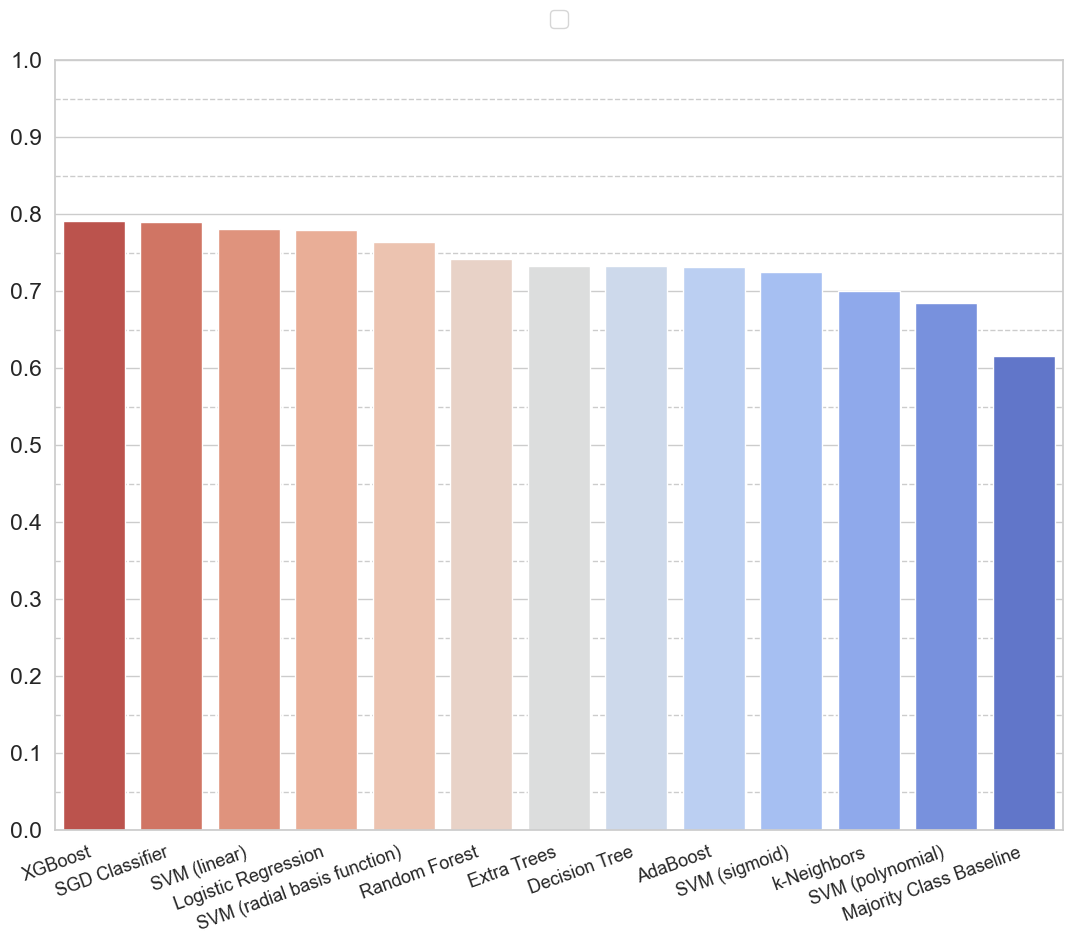

In [13]:
dd = pd.DataFrame(data=results_bow,
                  columns = ['classifier','f1'])
pal = 'coolwarm_r'
fig, ax = plt.subplots()
fig.set_size_inches(13, 10)
sns.barplot(x="classifier", y='f1', ci="sd", palette=pal, order=dd.groupby('classifier').mean().sort_values('f1',ascending=False).index.tolist(), data=dd, dodge=True)
plt.ylim(ymax = 1,ymin=0)
plt.legend(ncol=4,loc='upper center', bbox_to_anchor=(0.5, 1.08))
#plt.title("recall")
ax.set_yticks(np.arange(0.0, 1.1, 0.1))
ax.set_yticks(np.arange(0.0, 1.05, 0.05),minor=True)
ax.yaxis.grid(which='minor', linestyle='--')
ax.yaxis.grid(which='major', linestyle='-')
plt.xlabel('')
plt.ylabel('')
ax.xaxis.set_ticklabels(ax.xaxis.get_ticklabels(), rotation=20, ha='right', fontsize=13)
fig.savefig("classifier_bow.png")

C:\Users\lubac\AppData\Local\Temp\ipykernel_19784\1469044287.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x="classifier", y='f1', ci="sd", palette=pal, order=dd.groupby('classifier').mean().sort_values('f1',ascending=False).index.tolist(), data=dd, dodge=True)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


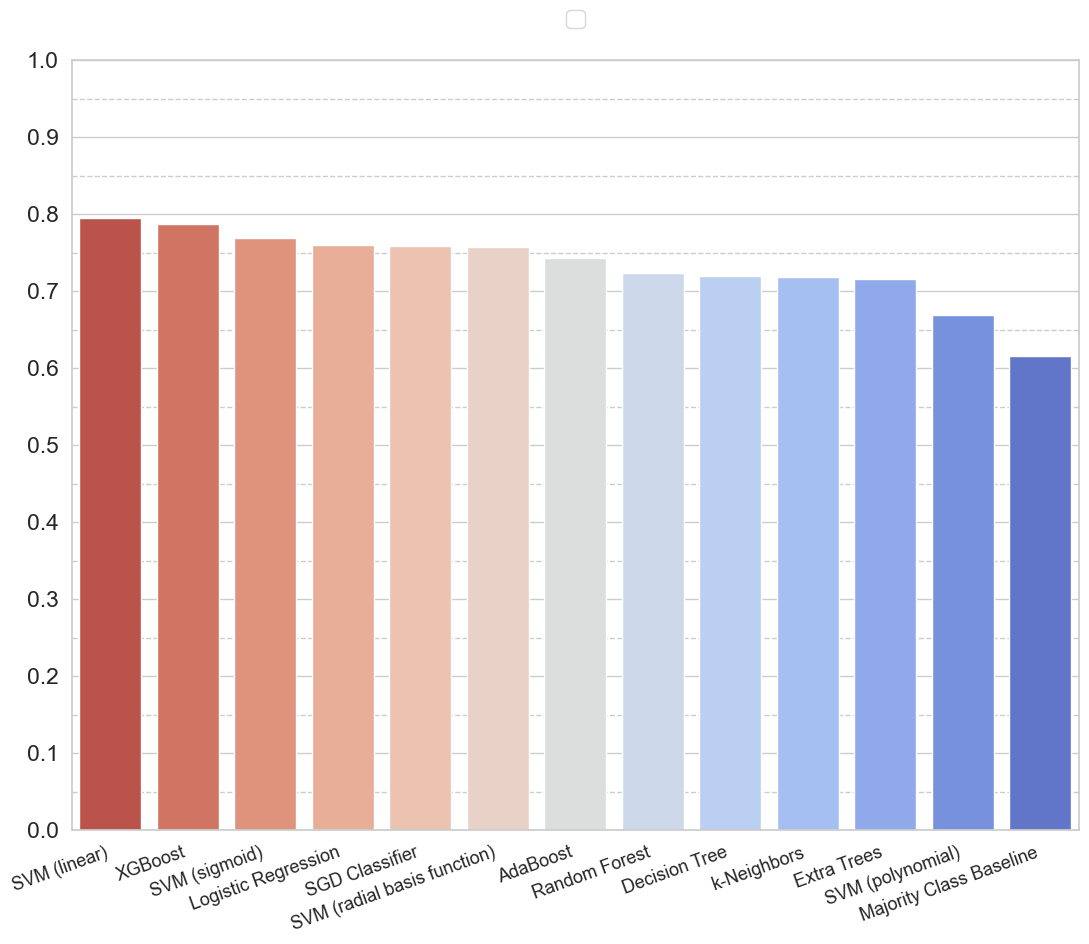

In [14]:
dd = pd.DataFrame(data=results_tfidf,
                  columns = ['classifier','f1'])
pal = 'coolwarm_r'
fig, ax = plt.subplots()
fig.set_size_inches(13, 10)
sns.barplot(x="classifier", y='f1', ci="sd", palette=pal, order=dd.groupby('classifier').mean().sort_values('f1',ascending=False).index.tolist(), data=dd, dodge=True)
plt.ylim(ymax = 1,ymin=0)
plt.legend(ncol=4,loc='upper center', bbox_to_anchor=(0.5, 1.08))
#plt.title("recall")
ax.set_yticks(np.arange(0.0, 1.1, 0.1))
ax.set_yticks(np.arange(0.0, 1.05, 0.05),minor=True)
ax.yaxis.grid(which='minor', linestyle='--')
ax.yaxis.grid(which='major', linestyle='-')
plt.xlabel('')
plt.ylabel('')
ax.xaxis.set_ticklabels(ax.xaxis.get_ticklabels(), rotation=20, ha='right', fontsize=13)
fig.savefig("classifier_tfidf.png")